In [1]:
rm(list=ls())
getwd()
dir='/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/2experiment'
setwd(dir)
load('reg_1_train.rda')
load('reg_1_test.rda')
load('reg_2_train.rda')
load('reg_2_test.rda')

[1] "/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/2experiment"

# data preprocessing for Matrix form

In [2]:
# droplevels
reg_1_train <- droplevels(reg_1_train)
reg_1_test <- droplevels(reg_1_test)
reg_2_train <- droplevels(reg_2_train)
reg_2_test <- droplevels(reg_2_test)

In [4]:
library(spatstat)
library(descr)

In [5]:
colnames(reg_1_train)

[1] "price"              "rating_count_tot"   "rating_count_ver"  
 [4] "user_rating_ver"    "ver"                "cont_rating"       
 [7] "prime_genre"        "sup_devices.num"    "ipadSc_urls.num"   
[10] "lang.num"           "size_mega"          "sum_rate_ver"      
[13] "user_rating_scaled"

In [6]:
# training data generation
eli.col <- c(13)  # id & track name & target eliminating
tr1.mat <- as.matrix(dummify(reg_1_train[,-eli.col]))
tr1.vec <- as.vector(reg_1_train[,13])
tr2.mat <- as.matrix(dummify(reg_2_train[,-eli.col]))
tr2.vec <- as.vector(reg_2_train[,13])

# test data generation
ts1.mat <- as.matrix(dummify(reg_1_test[,-eli.col]))
ts1.vec <- as.vector(reg_1_test[,13])
ts2.mat <- as.matrix(dummify(reg_2_test[,-eli.col]))
ts2.vec <- as.vector(reg_2_test[,13])

,Frequency,Percent
-2.32111658768532,743,12.9532775
-1.66288469994415,36,0.6276151
-1.33376875607357,43,0.7496513
-1.00465281220299,91,1.5864714
-0.675536868332406,162,2.8242678
-0.346420924461824,298,5.1952580
-0.0173049805912425,550,9.5885635
0.311810963279339,1290,22.4895397
0.640926907149921,2124,37.0292887
0.970042851020503,399,6.9560669


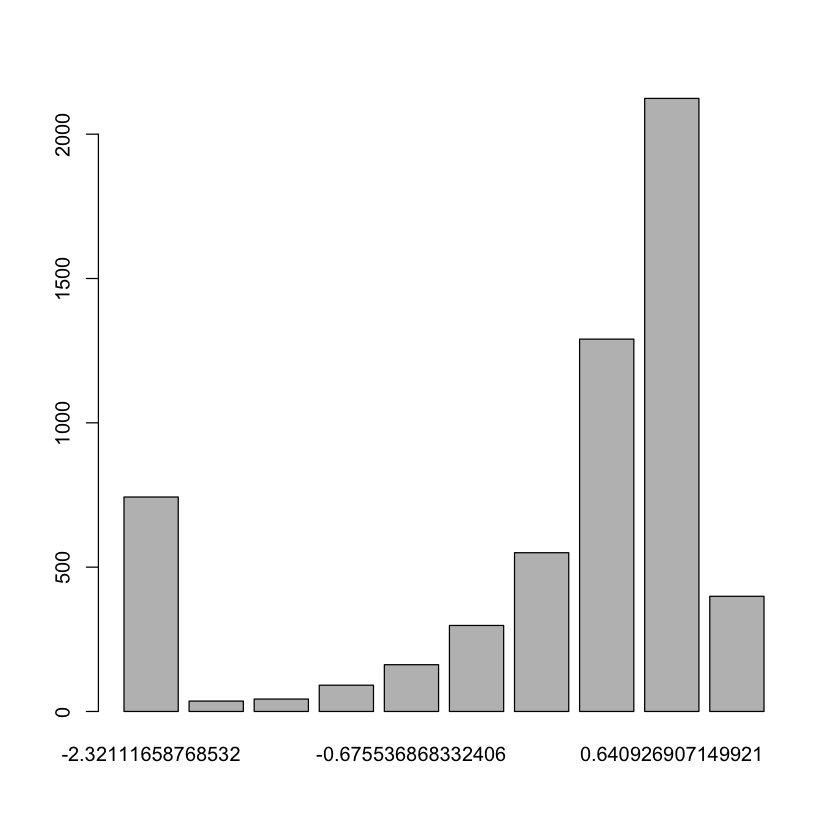

In [7]:

# distribution of target(dependent) variable
freq(tr1.vec)  # bimodal format


## 1.1 LASSO 
- data1 : prime_genre : game vs non-game

In [9]:
#install.packages('glmnet')
library(glmnet)

In [10]:
### Method 1 : LASSO regression
## data : tr1 data
l.fit1 <- glmnet(x=tr1.mat,y=tr1.vec,alpha = 1)  # LASSO fitting for tr 1 data

In [11]:
summary(l.fit1)

          Length Class     Mode   
a0          67   -none-    numeric
beta      1139   dgCMatrix S4     
df          67   -none-    numeric
dim          2   -none-    numeric
lambda      67   -none-    numeric
dev.ratio   67   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

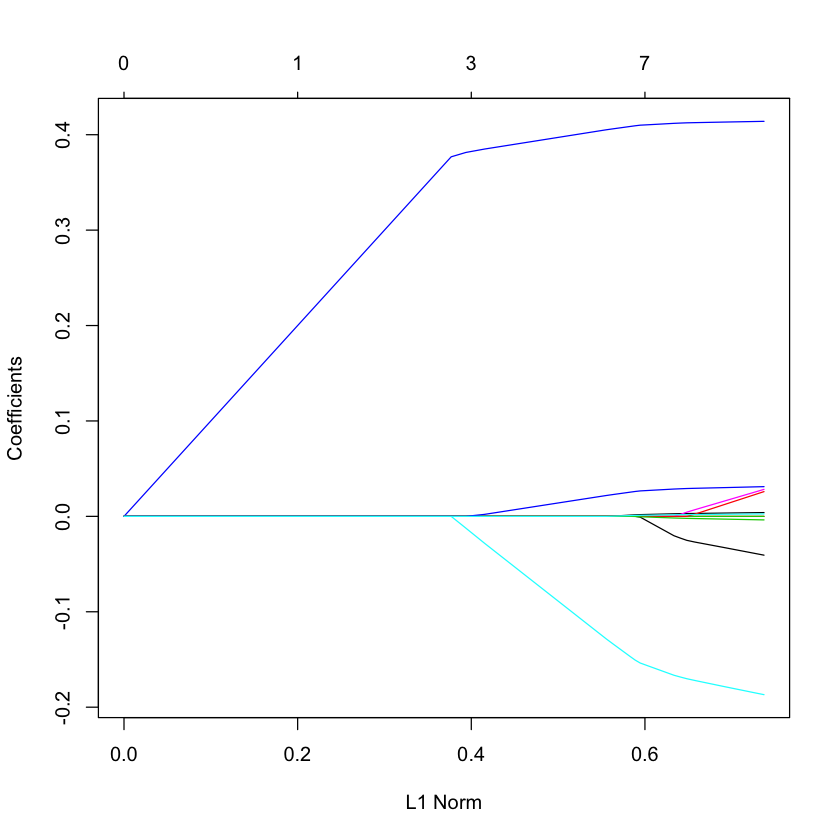

In [12]:
plot(l.fit1)

In [13]:
length(l.fit1$lambda)

[1] 67

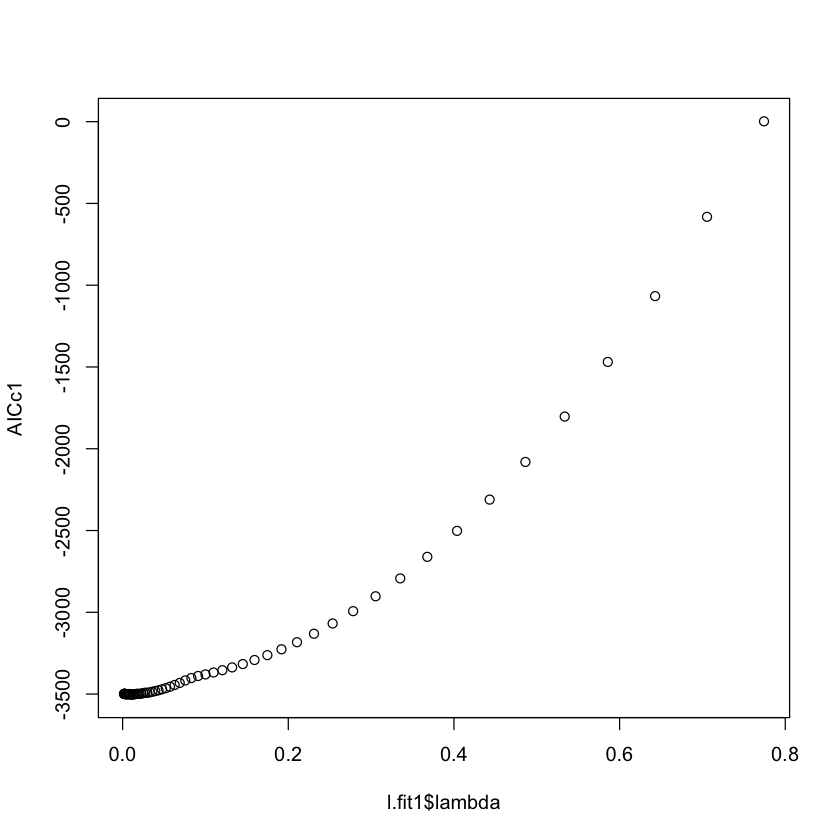

In [14]:
## AIC.LASSO for tr1
# for each lambda in LASSO modeling calculate AIC
AICc1 <- NULL 
for (i in 1:length(l.fit1 $ lambda)){
  fit1 <- glmnet(x=tr1.mat, y=tr1.vec, lambda = l.fit1 $ lambda[i],alpha = 1) 
  tLL1 <- fit1$nulldev - deviance(fit1) 
  k1 <- fit1$df 
  n1 <- fit1$nobs 
  AICc1  <-c(AICc1,-tLL1+2*k1+2*k1*(k1+1)/(n1-k1-1) )  
}
plot(x=l.fit1$lambda,AICc1) # optimal lambda would be in around zero area
                            # So we should enlarge the area around zero

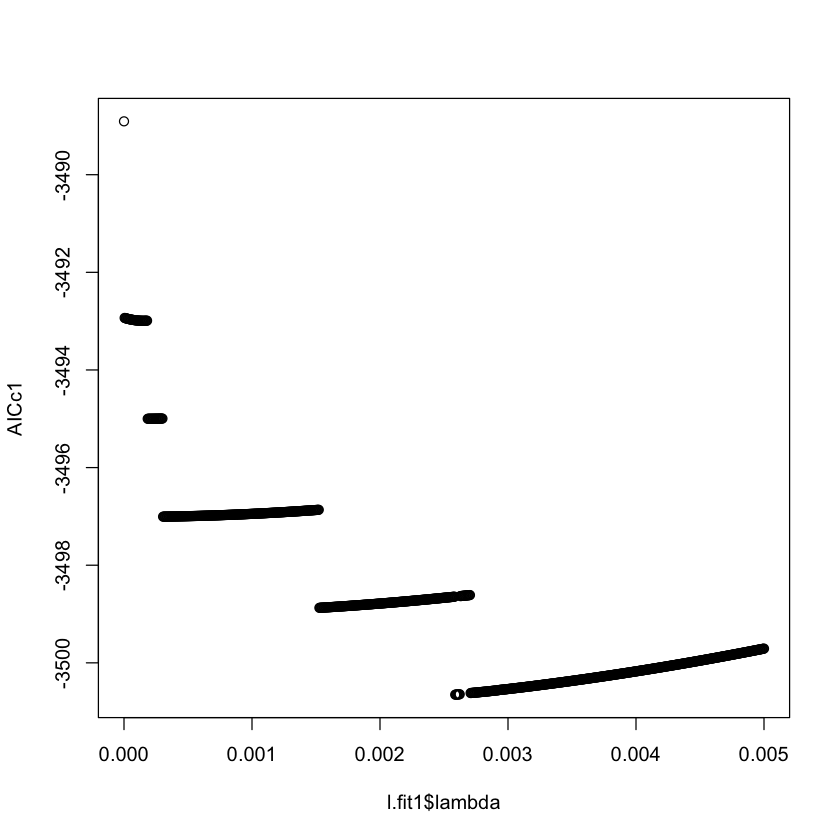

In [15]:
# generate lambda vector & LASSO fit for each lambda vector
l.vec1 <- seq(0,0.005,length.out = 1000) ; l.fit1 <- glmnet(x=tr1.mat,y=tr1.vec,alpha = 1, lambda= l.vec1)
# Re-calculate AIC
AICc1 <- NULL 
for (i in 1:length(l.fit1 $ lambda)){
  fit1 <- glmnet(x=tr1.mat, y=tr1.vec, lambda = l.fit1 $ lambda[i],alpha = 1) 
  tLL1 <- fit1$nulldev - deviance(fit1) 
  k1 <- fit1$df 
  n1 <- fit1$nobs 
  AICc1  <-c(AICc1,-tLL1+2*k1+2*k1*(k1+1)/(n1-k1-1) )  
}
plot(x=l.fit1$lambda,AICc1)

In [16]:
index1 <- which.min(AICc1) ;
bestAIC.fit1 <- glmnet(x = tr1.mat, y = tr1.vec, lambda = l.fit1 $ lambda[index1],alpha = 1) 
summary(bestAIC.fit1)

          Length Class     Mode   
a0         1     -none-    numeric
beta      17     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

In [17]:
coef(bestAIC.fit1)

18 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)           -1.243395e+00
price                  3.829931e-03
rating_count_tot       2.088240e-08
rating_count_ver       1.548588e-06
user_rating_ver        4.138303e-01
ver.0                 -1.848039e-01
ver.1                  .           
cont_rating.12.        2.471970e-02
cont_rating.17.       -3.925673e-02
cont_rating.4.         .           
cont_rating.9.         2.245448e-02
prime_genre.Games      .           
prime_genre.Non_Games  .           
sup_devices.num       -3.502025e-03
ipadSc_urls.num        3.088381e-02
lang.num               2.440438e-03
size_mega              .           
sum_rate_ver           .           

# 1.2 LASSO 

- data: prime_genre 

- 'Education' 'Entertainment' 'Games' 'Photo & Video' 'Utilities' 'etc'

In [18]:
### Method 1 : LASSO regression
## data : tr2 data
## AIC.LASSO for tr2
l.fit2 <- glmnet(x=tr2.mat,y=tr2.vec,alpha = 1)

In [19]:
summary(l.fit2)

          Length Class     Mode   
a0          69   -none-    numeric
beta      1449   dgCMatrix S4     
df          69   -none-    numeric
dim          2   -none-    numeric
lambda      69   -none-    numeric
dev.ratio   69   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

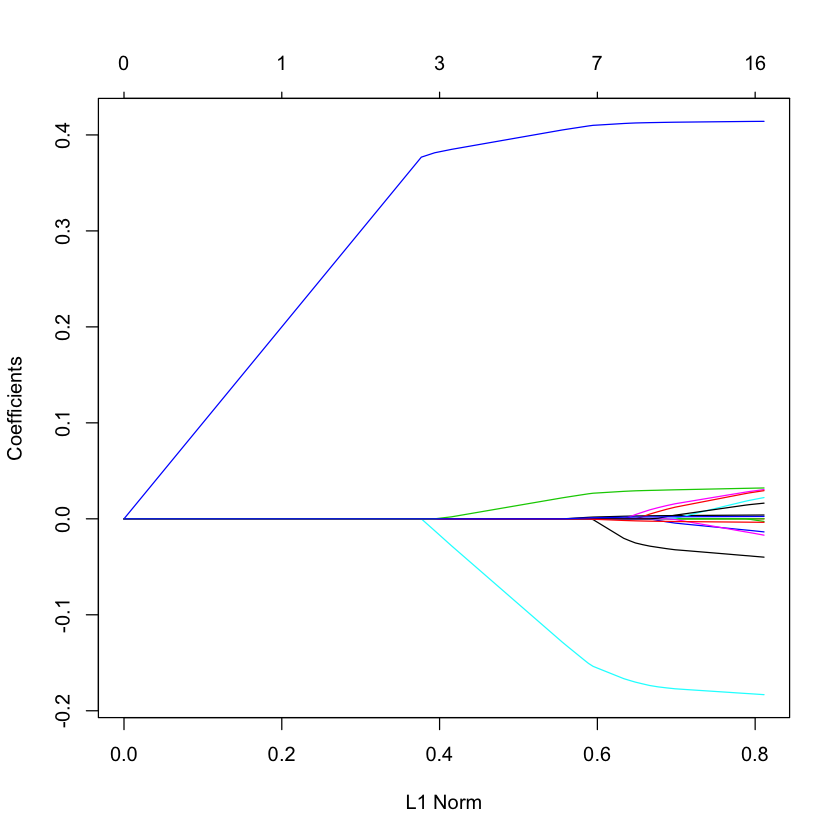

In [20]:
plot(l.fit2)

In [21]:
length(l.fit2$lambda)

[1] 69

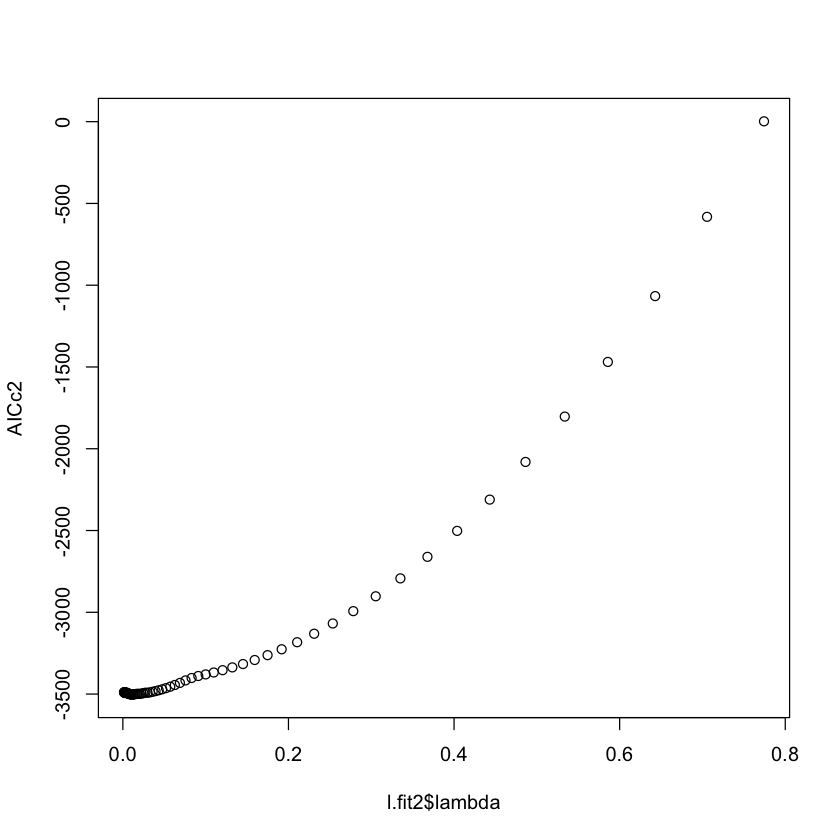

In [22]:
# for each lambda in LASSO modeling calculate AIC
AICc2 <- NULL
for (i in 1:length(l.fit2 $ lambda)){
  fit2 <- glmnet(x=tr2.mat, y=tr2.vec, lambda = l.fit2 $ lambda[i],alpha = 1) 
  tLL2 <- fit2$nulldev - deviance(fit2) 
  k2 <- fit2$df 
  n2 <- fit2$nobs 
  AICc2  <-c(AICc2,-tLL2+2*k2+2*k2*(k2+1)/(n2-k2-1) ) 
}

plot(x=l.fit2$lambda,AICc2) # optimal lambda would be in around zero area
                            # So we should enlarge the area around zero

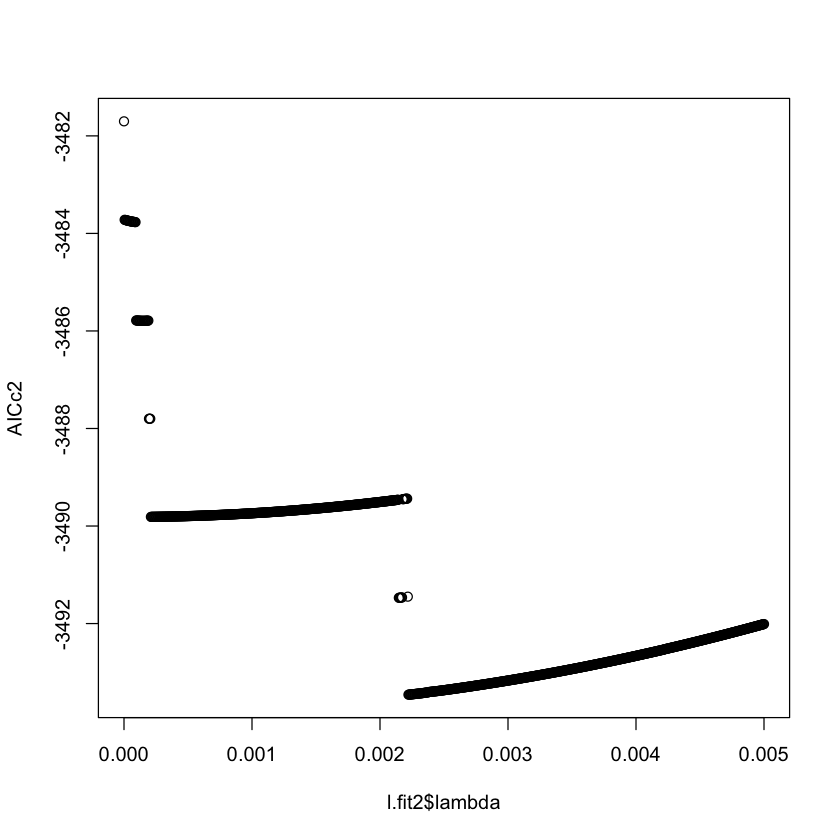

In [23]:
# generate lambda vector & LASSO fit for each lambda vector
l.vec2 <- seq(0,0.005,length.out = 1000) ; l.fit2 <- glmnet(x=tr2.mat,y=tr2.vec,alpha = 1, lambda= l.vec2) 
# Re-calculate AIC
AICc2 <- NULL 
for (i in 1:length(l.fit2 $ lambda)){
  fit2 <- glmnet(x=tr2.mat, y=tr2.vec, lambda = l.fit2 $ lambda[i],alpha = 1) 
  tLL2 <- fit2$nulldev - deviance(fit2) 
  k2 <- fit2$df 
  n2 <- fit2$nobs 
  AICc2  <-c(AICc2,-tLL2+2*k2+2*k2*(k2+1)/(n2-k2-1) ) 
}
plot(x=l.fit2$lambda,AICc2)

In [24]:
index2 <- which.min(AICc2) ;
bestAIC.fit2 <- glmnet(x = tr2.mat, y = tr2.vec, lambda = l.fit2 $ lambda[index2],alpha = 1) 
summary(bestAIC.fit2)

          Length Class     Mode   
a0         1     -none-    numeric
beta      21     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

In [25]:
coef(bestAIC.fit2)

22 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -1.254027e+00
price                      3.834985e-03
rating_count_tot           2.295962e-08
rating_count_ver           1.637220e-06
user_rating_ver            4.140131e-01
ver.0                     -1.819675e-01
ver.1                      .           
cont_rating.12.            2.727276e-02
cont_rating.17.           -3.868442e-02
cont_rating.4.             .           
cont_rating.9.             2.599610e-02
prime_genre.Education      .           
prime_genre.Entertainment -1.163675e-02
prime_genre.Games          .           
prime_genre.Photo...Video  1.796328e-02
prime_genre.Utilities     -1.360435e-02
prime_genre.etc            1.404769e-02
sup_devices.num           -3.462948e-03
ipadSc_urls.num            3.174353e-02
lang.num                   2.392906e-03
size_mega                  .           
sum_rate_ver               .           

# 2.1 Lidge

- data: prime_genre 

- game vs non_game

In [26]:
### Method 2 : Ridge
## data : tr1 data
## AIC Ridge for tr1
r.fit1 <- glmnet(x=tr1.mat,y=tr1.vec,alpha = 0)  # Ridge fitting

In [27]:
summary(r.fit1) 

          Length Class     Mode   
a0         100   -none-    numeric
beta      1700   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

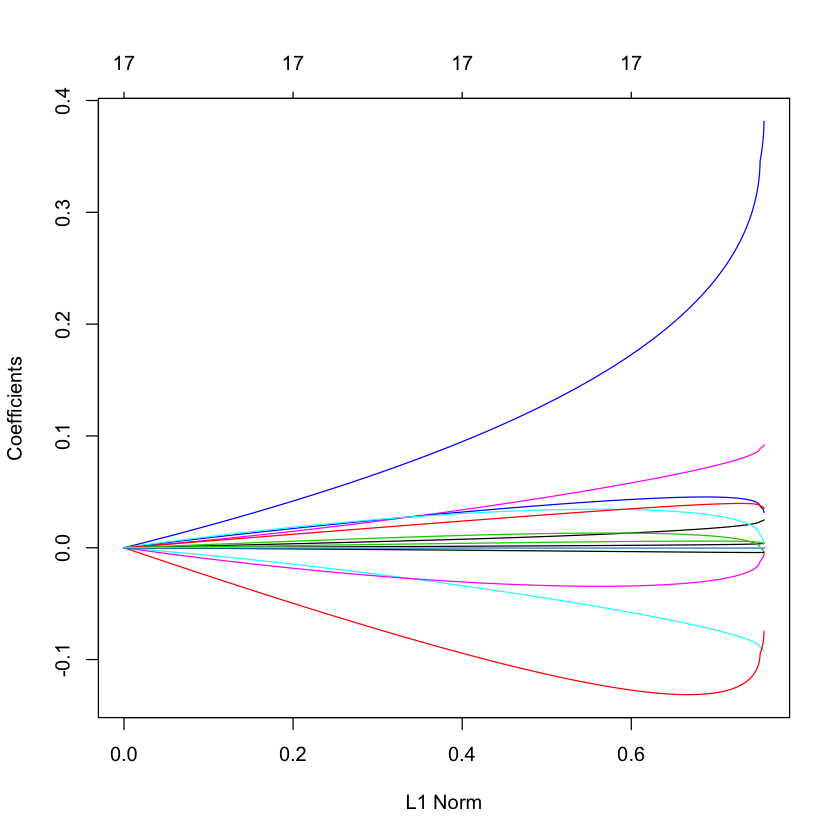

In [28]:
plot(r.fit1) 

In [29]:
length(r.fit1$lambda) 

[1] 100

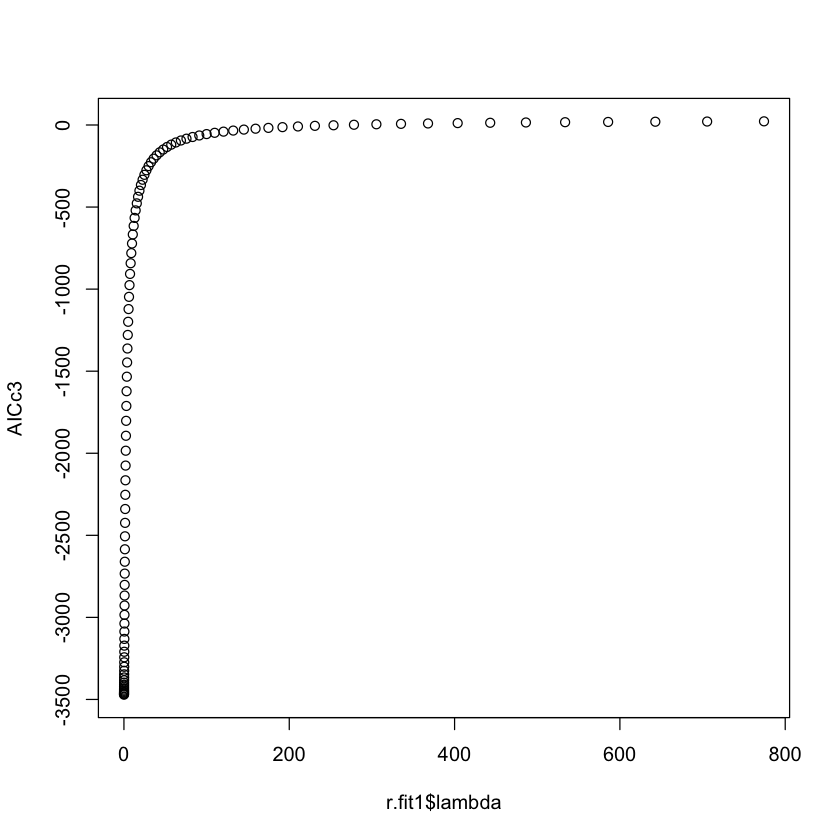

In [30]:
# for each lambda in RIDGE modeling calculate AIC
AICc3 <- NULL
for (i in 1:length(r.fit1 $ lambda)){
  fit3 <- glmnet(x=tr1.mat, y=tr1.vec, alpha=0, lambda = r.fit1 $ lambda[i]) 
  tLL3 <- fit3$nulldev - deviance(fit3) 
  k3 <- fit3$df 
  n3 <- fit3$nobs 
  AICc3  <-c(AICc3,-tLL3+2*k3+2*k3*(k3+1)/(n3-k3-1) ) 
}
plot(x=r.fit1$lambda,AICc3) # optimal lambda would be in under 0.08 area
                            # So we should enlarge the area under 0.08

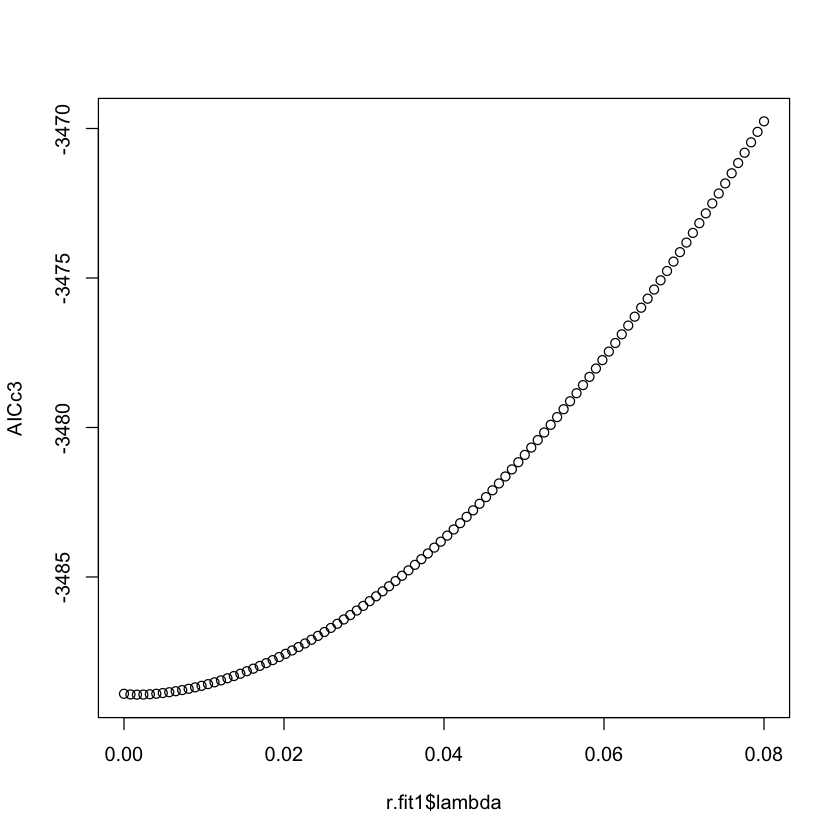

In [31]:
# generate lambda vector & RIDGE fit for lambda vector
l.vec3 <- seq(0.08,0,length.out=100) ; r.fit1 <- glmnet(x=tr1.mat,y=tr1.vec,alpha = 0, lambda = l.vec3)
# Re-calculate AIC
AICc3 <- NULL
for (i in 1:length(r.fit1 $ lambda)){
  fit3 <- glmnet(x=tr1.mat, y=tr1.vec, alpha=0, lambda = r.fit1 $ lambda[i]) 
  tLL3 <- fit3$nulldev - deviance(fit3) 
  k3 <- fit3$df 
  n3 <- fit3$nobs 
  AICc3  <-c(AICc3,-tLL3+2*k3+2*k3*(k3+1)/(n3-k3-1) ) 
}
plot(x=r.fit1$lambda,AICc3)

In [32]:
index3 <- which.min(AICc3) ;
bestAIC.fit3 <- glmnet(x = tr1.mat, y = tr1.vec, alpha=0, lambda = r.fit1 $ lambda[index3]) 
# we can see that the optimal lambda is zero 
# we should consider this situation is abnormal

# 2.2 Lidge

- data: prime_genre 

- 'Education' 'Entertainment' 'Games' 'Photo & Video' 'Utilities' 'etc'

In [33]:
### Method 2 : Ridge
## data : tr2 data
## AIC Ridge for tr2
r.fit2 <- glmnet(x=tr2.mat,y=tr2.vec,alpha = 0) # Ridge fitting

In [34]:
summary(r.fit2)

          Length Class     Mode   
a0         100   -none-    numeric
beta      2100   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

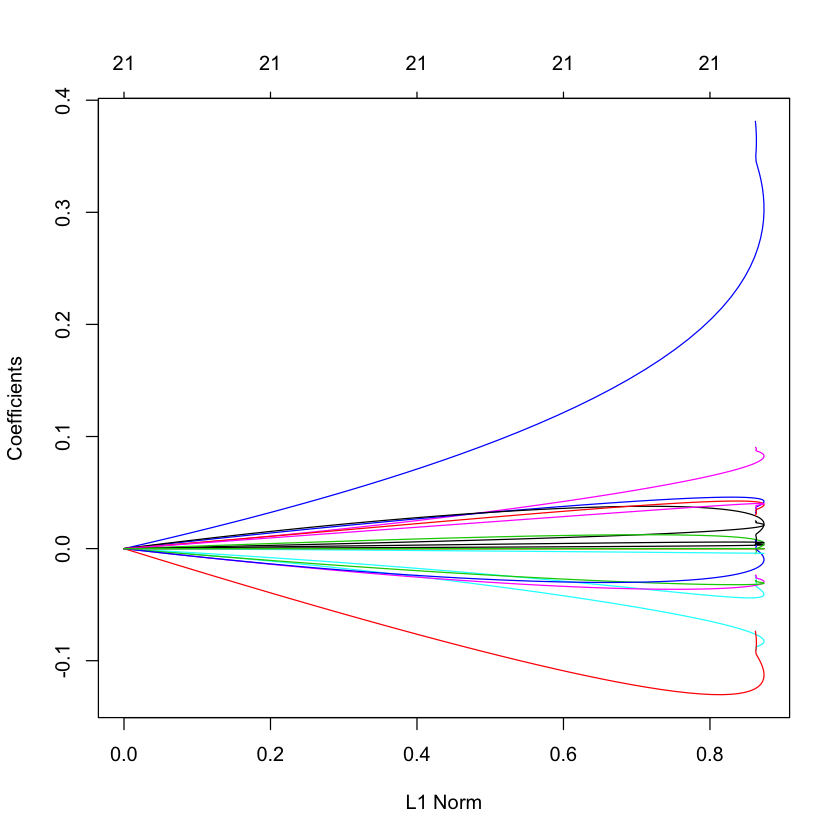

In [35]:
plot(r.fit2)

In [36]:
length(r.fit2$lambda)

[1] 100

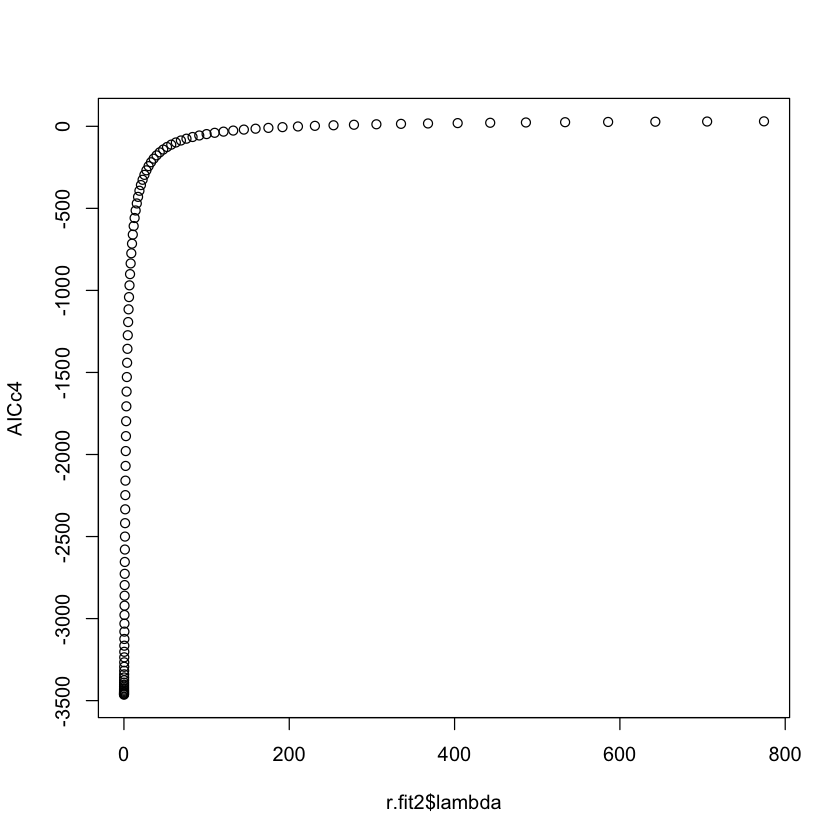

In [37]:
# for each lambda in RIDGE modeling calculate AIC
AICc4 <- NULL
for (i in 1:length(r.fit2 $ lambda)){
  fit4 <- glmnet(x=tr2.mat, y=tr2.vec, alpha=0, lambda = r.fit2 $ lambda[i]) 
  tLL4 <- fit4$nulldev - deviance(fit4) 
  k4 <- fit4$df 
  n4 <- fit4$nobs 
  AICc4  <-c(AICc4,-tLL4+2*k4+2*k4*(k4+1)/(n4-k4-1) ) 
} 
plot(x=r.fit2$lambda,AICc4) # optimal lambda would be in under 0.08 area
                            # So we should enlarge the area under 0.08

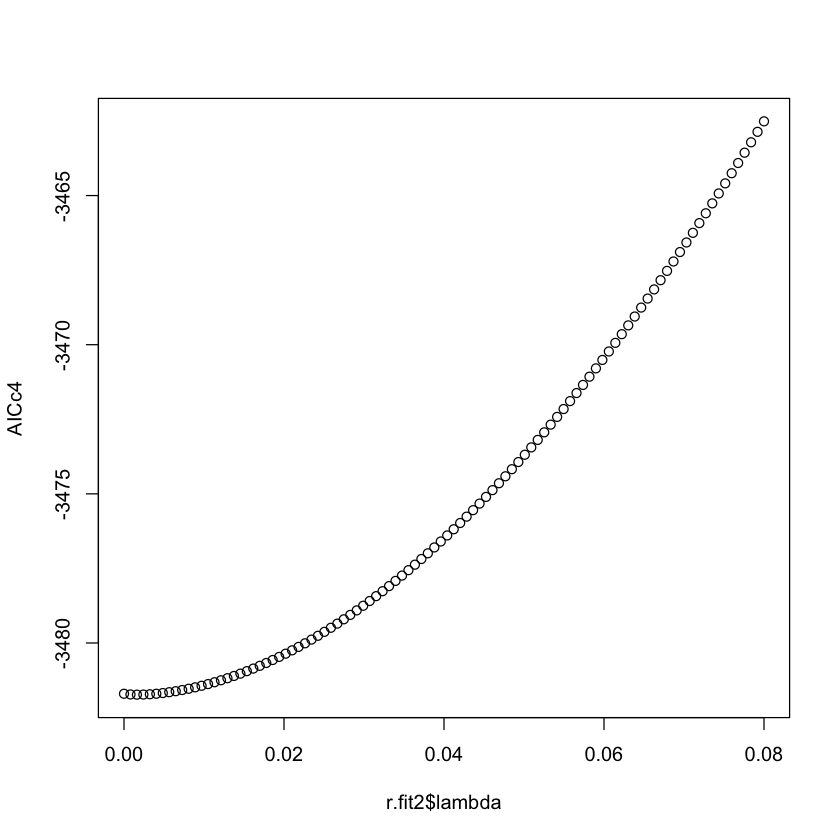

In [38]:
# generate lambda vector & RIDGE fit for lambda vector
l.vec4 <- seq(0.08,0,length.out=100) ; r.fit2 <- glmnet(x=tr2.mat,y=tr2.vec,alpha = 0, lambda = l.vec4)
# Re-calculate AIC
AICc4 <- NULL
for (i in 1:length(r.fit2 $ lambda)){
  fit4 <- glmnet(x=tr2.mat, y=tr2.vec, alpha=0, lambda = r.fit2 $ lambda[i]) 
  tLL4 <- fit4$nulldev - deviance(fit4) 
  k4 <- fit4$df 
  n4 <- fit4$nobs 
  AICc4  <-c(AICc4,-tLL4+2*k4+2*k4*(k4+1)/(n4-k4-1) ) 
} 
plot(x=r.fit2$lambda,AICc4)

In [39]:
index4 <- which.min(AICc4) 
bestAIC.fit4 <- glmnet(x = tr2.mat, y = tr2.vec, alpha=0, lambda = r.fit2 $ lambda[index4]) 

# 3.1 SCAD

- data: prime_genre 

- game, non_game

In [40]:
#install.packages('ncvreg')
library(ncvreg)

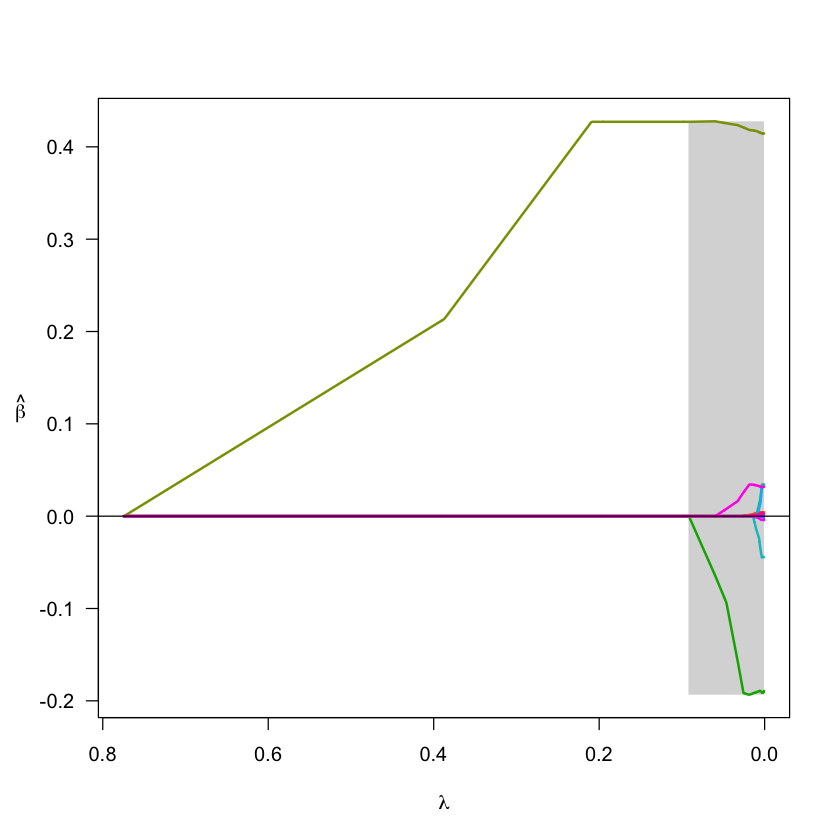

In [41]:
### Method3 : SCAD
## data : tr1 data
## AIC SCAD for tr1
s.fit1 <- ncvreg(X=tr1.mat,y=tr1.vec,alpha = 1, penalty= "SCAD" , nlambda=1000) # SCAD fitting
plot(s.fit1) 

In [42]:
length(s.fit1$lambda) 

[1] 1000

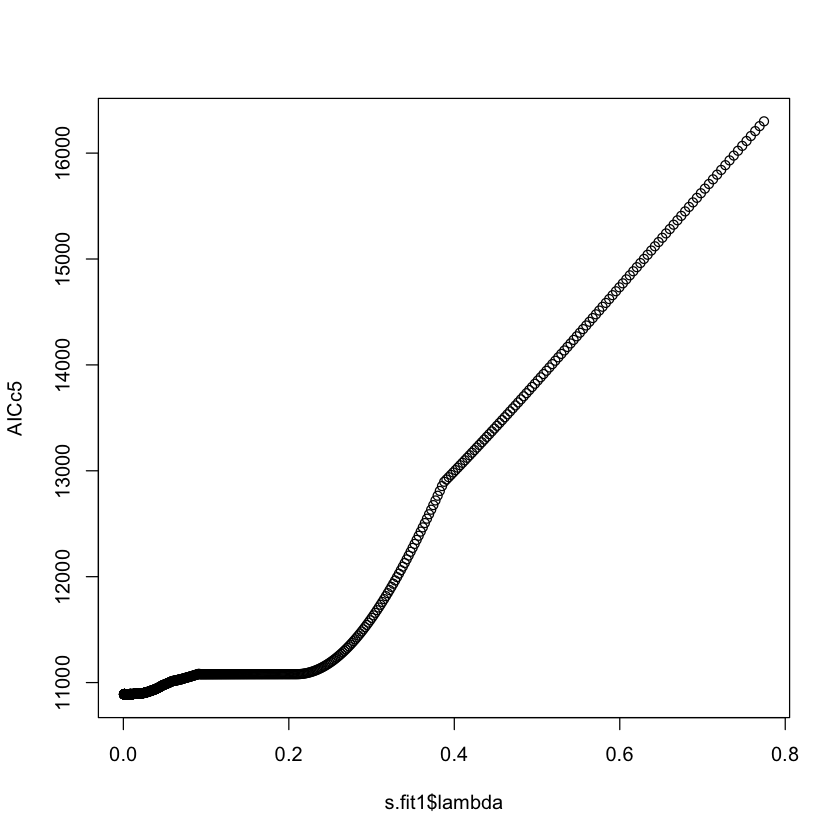

In [43]:
# for each lambda in SCAD modeling calculate AIC
AICc5 <- NULL
AICc5 <- AIC(s.fit1)
plot(s.fit1$lambda,AICc5) # optimal lambda would be in around zero area
                          # So we should enlarge the area around zero

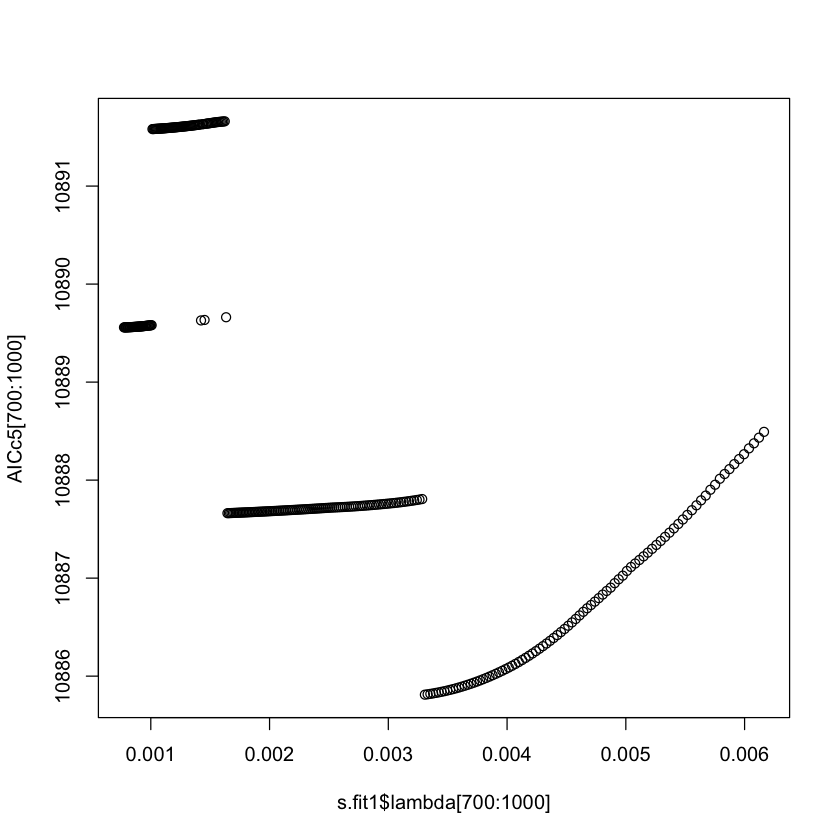

In [44]:
plot(s.fit1$lambda[700:1000],AICc5[700:1000])

In [45]:
index5 <- which.min(AICc5) 
index5 <- as.numeric(names(index5))
bestAIC.fit5 <- ncvreg(X=tr1.mat, y=tr1.vec, alpha = 1, penalty = "SCAD",lambda = index5) 

# 3.2 SCAD

- data: prime_genre 

- 'Education' 'Entertainment' 'Games' 'Photo & Video' 'Utilities' 'etc'

In [46]:
### Method3 : SCAD
## data : tr1 data
## AIC SCAD for tr1
s.fit2 <- ncvreg(X=tr2.mat,y=tr2.vec,alpha = 1, penalty = "SCAD", nlambda = 1000) # SCAD fitting

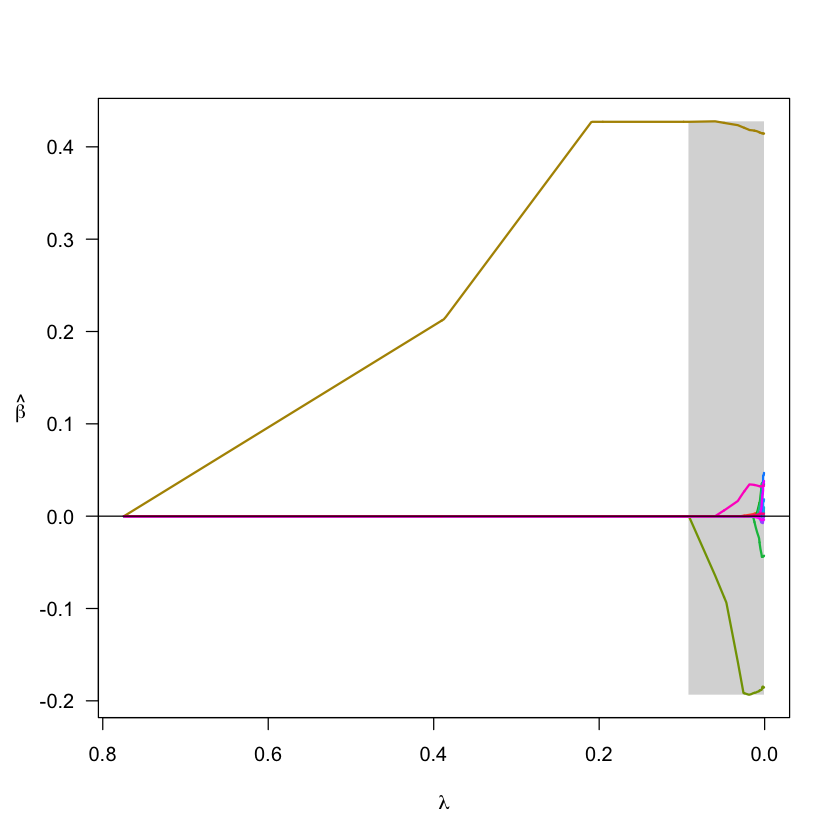

In [47]:
plot(s.fit2)

In [48]:
length(s.fit2$lambda)

[1] 1000

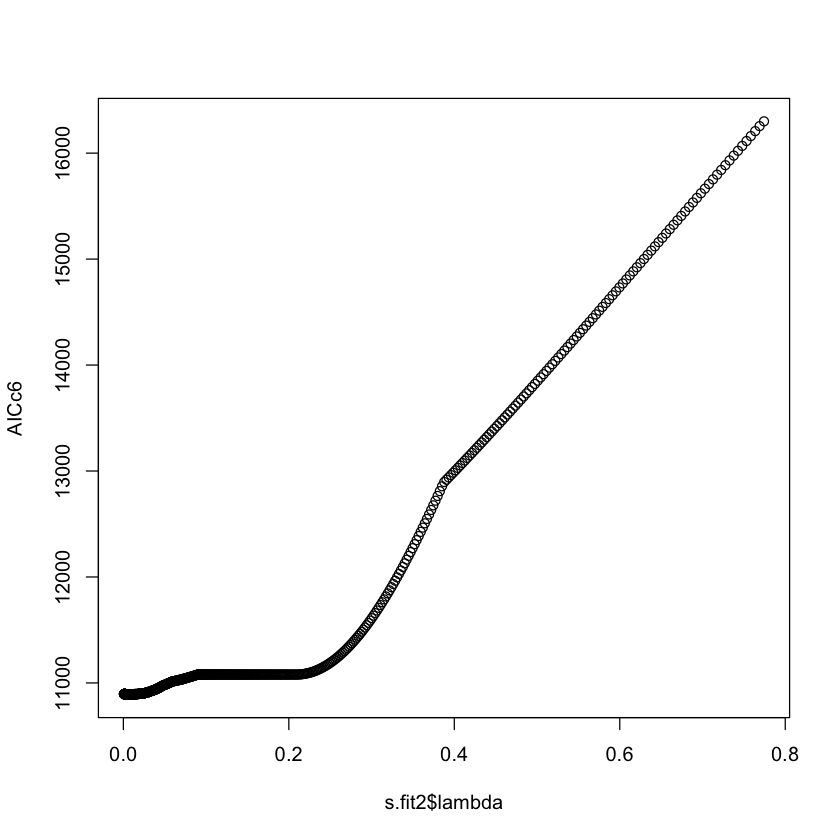

In [49]:
# for each lambda in SCAD modeling calculate AIC
AICc6 <- NULL
AICc6 <- AIC(s.fit2)
plot(s.fit2$lambda,AICc6) # optimal lambda would be in around zero area
                          # So we should enlarge the area around zero

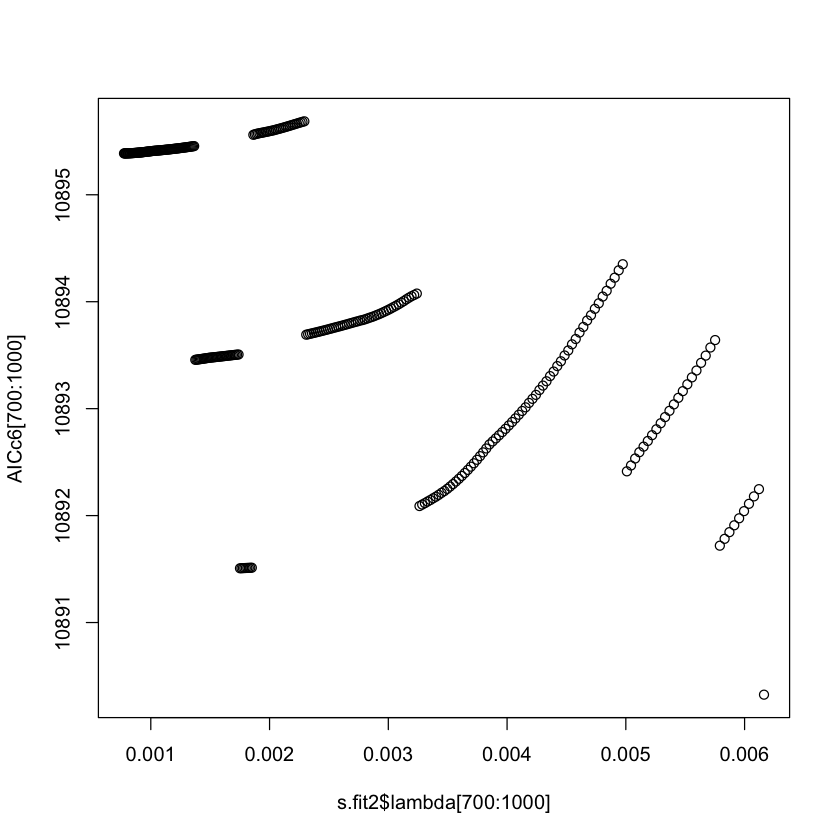

In [50]:
plot(s.fit2$lambda[700:1000],AICc6[700:1000])

In [51]:
index6 <- which.min(AICc6) 
index6 <- as.numeric(names(index6))
bestAIC.fit6 <- ncvreg(X=tr2.mat, y=tr2.vec, alpha = 1, penalty = "SCAD", lambda = index6) 

# 4. result

In [52]:
### Model assessment
## using 5 types of test error
# predicted value for each model
m1.hat <- predict(bestAIC.fit1, newx = ts1.mat)  # Lasso for tr1 predicted value
m2.hat <- predict(bestAIC.fit2, newx = ts2.mat)  # Lasso for tr2 predicted value 
m3.hat <- predict(bestAIC.fit3, newx = ts1.mat)  # ridge for tr1 predicted value
m4.hat <- predict(bestAIC.fit4, newx = ts2.mat)  # ridge for tr2 predicted value
m5.hat <- predict(bestAIC.fit5, alpha = 1 , ts1.mat)  # SCAD for tr1 predicted value
m6.hat <- predict(bestAIC.fit6, alpha = 1 , ts2.mat)  # SCAD for tr2 predicted value

# Binding
pre.mat <- cbind(m1.hat,m2.hat,m3.hat,m4.hat,m5.hat,m6.hat)
dim(pre.mat)

# test error determination
av.err = NULL  # Average error
mae = NULL # Mean of absolute error
mape = NULL # Mean of absolute percentage error 
mse = NULL # Mean of squared error
rmse = NULL # Rooted mean of squared error
rst <- matrix(NA, nrow=6, ncol=5)
colnames(rst) <- c("AVE","MAE","MAPE","MSE","RMSE")
rownames(rst) <- c("LASSO_tr1","LASSO_tr2","Ridge_tr1","Ridge_tr2","SCAD_tr1","SCAD_tr2")

# test error calculation
for (i in c(1,3,5)){
  rst[i,1] <- mean(ts1.vec - pre.mat[,i])
  rst[i,2] <- sum(abs(ts1.vec - pre.mat[,i]))/length(pre.mat[,i])
  rst[i,3] <- (sum((abs(ts1.vec - pre.mat[,i]))/(abs(ts1.vec))))/length(pre.mat[,i])*100
  rst[i,4] <- sum((ts1.vec - pre.mat[,i])^2)/length(pre.mat[,i])
  rst[i,5] <- sqrt(sum((ts1.vec - pre.mat[,i])^2))/length(pre.mat[,i])
}

for (i in c(2,4,6)){
  rst[i,1] <- mean(ts2.vec - pre.mat[,i])
  rst[i,2] <- sum(abs(ts2.vec - pre.mat[,i]))/length(pre.mat[,i])
  rst[i,3] <- (sum((abs(ts2.vec - pre.mat[,i]))/(abs(ts2.vec))))/length(pre.mat[,i])*100
  rst[i,4] <- sum((ts2.vec - pre.mat[,i])^2)/length(pre.mat[,i])
  rst[i,5] <- sqrt(sum((ts2.vec - pre.mat[,i])^2))/length(pre.mat[,i])
}
rst

[1] 1434    6

,AVE,MAE,MAPE,MSE,RMSE
LASSO_tr1,-0.02007630,0.4206348,311.2628,0.3836177,0.01635591
LASSO_tr2,-0.01990903,0.4208208,311.1102,0.3838227,0.01636028
Ridge_tr1,-0.01962571,0.4217349,311.7908,0.3839434,0.01636285
Ridge_tr2,-0.01960942,0.4218109,311.5733,0.3841851,0.01636800
SCAD_tr1,-0.01989428,0.4214796,312.2024,0.3838937,0.01636179
SCAD_tr2,-0.02056274,0.4204771,312.5121,0.3838750,0.01636139


In [53]:
which.min(rst[,1]) # Optimal model based on average error
which.min(rst[,2]) # Optimal model based on MAE
which.min(rst[,3]) # Optimal model based on MAPE
which.min(rst[,4]) # Optimal model based on MSE
which.min(rst[,5]) # Optimal model based on RMSE

SCAD_tr2 
       6

SCAD_tr2 
       6

LASSO_tr2 
        2

LASSO_tr1 
        1

LASSO_tr1 
        1